# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Uploading Dataset**

In [ ]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

# **Data Pre-Processing and Analysis**

In [ ]:
data = pd.read_csv("diabetes.csv")
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print(data.groupby("Outcome").size())

Outcome
0    500
1    268
dtype: int64


In [ ]:
a = data[data.BloodPressure == 0].shape[0]
print("Total:-",a)

Total:- 35


In [ ]:
print(data[data.Glucose == 0].shape[0])

5


In [ ]:
print(data[data.BloodPressure == 0].groupby("Outcome")["Age"].count())

Outcome
0    19
1    16
Name: Age, dtype: int64


In [ ]:
data_mod = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]
data_mod.shape

(724, 9)

In [ ]:
data_mod.groupby("Outcome").size()

Outcome
0    475
1    249
dtype: int64

In [ ]:
X = data.drop("Outcome",axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
X.shape


(768, 8)

In [ ]:
y = data["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
y.shape

(768,)

In [ ]:
data_mod.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
Insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


# **DATA VISUALIZATION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


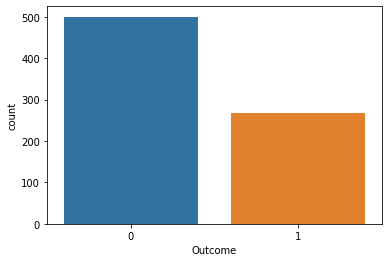

In [ ]:
sns.countplot(data["Outcome"], label="Count")

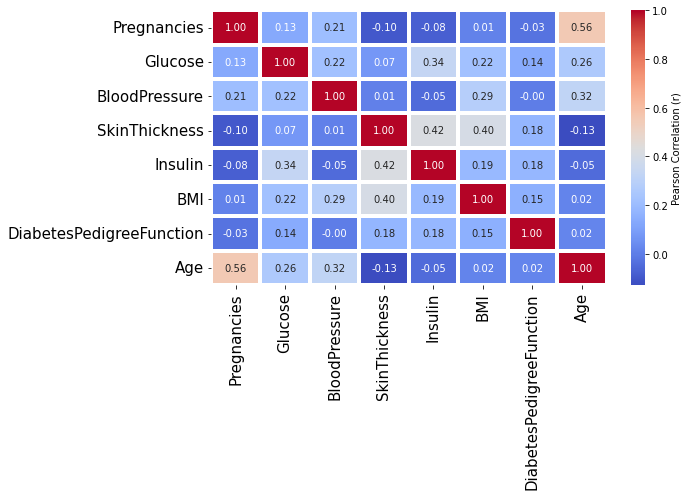

In [ ]:
plt.figure(figsize=(10,7))
corr_mat = data_mod.iloc[:,:-1].corr()
sns.heatmap(corr_mat,cmap="coolwarm", fmt='0.2f', annot=True, lw=3, cbar_kws={'label':'Pearson Correlation (r)'})
plt.xticks(size=15,rotation=90)
plt.yticks(size=15)
plt.tight_layout()
plt.savefig('Correlation.png',dpi=500);

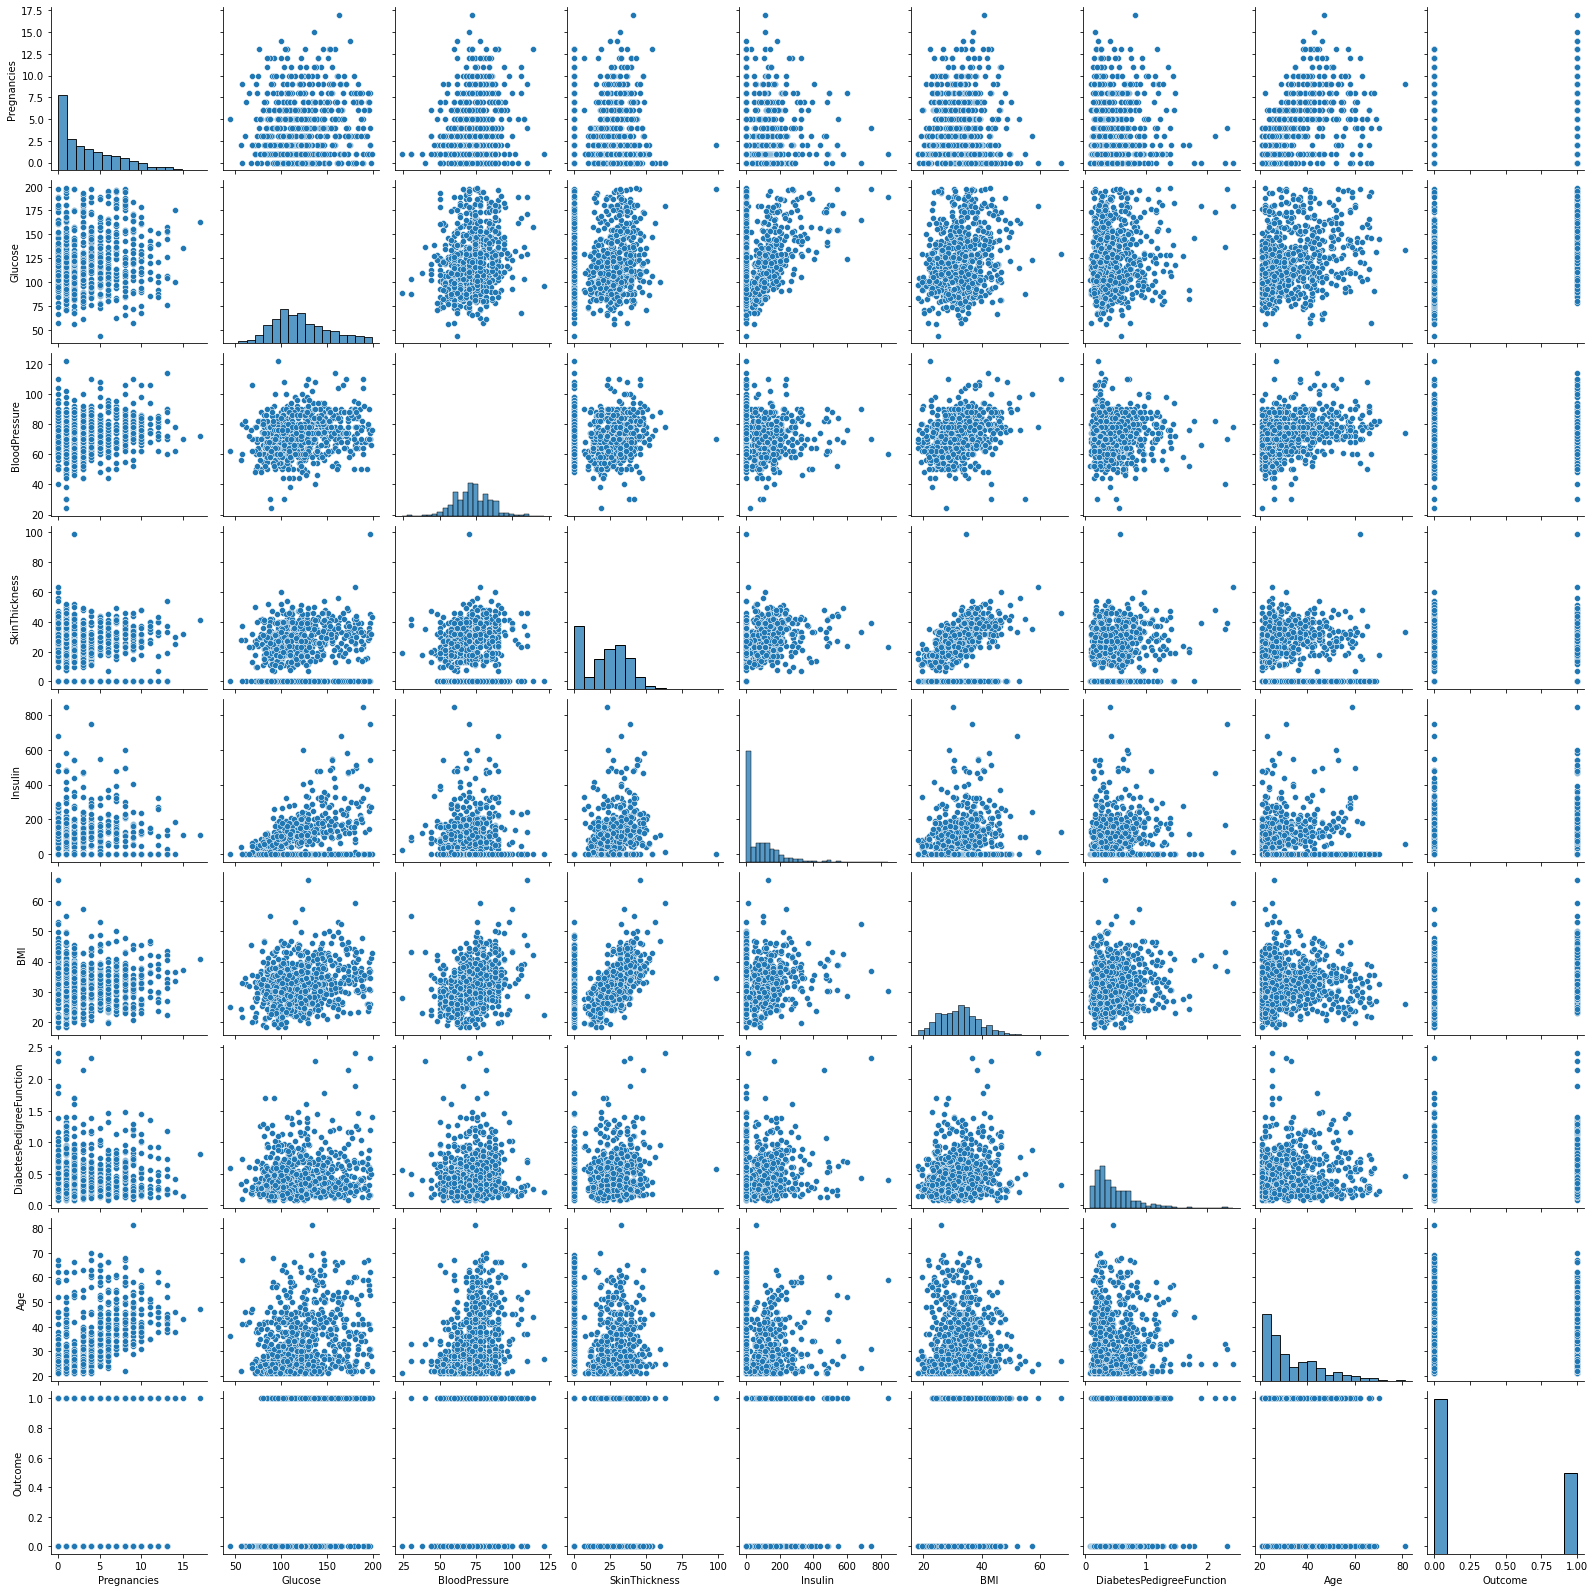

In [ ]:
sns.pairplot(data_mod)

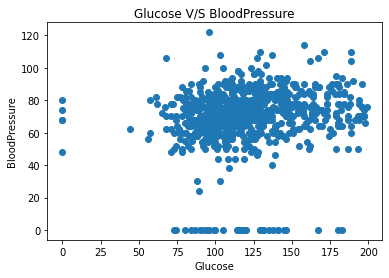

In [ ]:
plt.scatter(data["Glucose"],data["BloodPressure"])
plt.title("Glucose V/S BloodPressure")
plt.xlabel("Glucose",size = 10)
plt.ylabel("BloodPressure",size = 10)
plt.show()

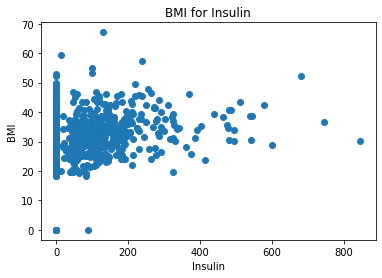

In [ ]:
plt.scatter(data["Insulin"],data.BMI)
plt.xlabel("Insulin")
plt.ylabel("BMI")
plt.title("BMI for Insulin")
plt.show()

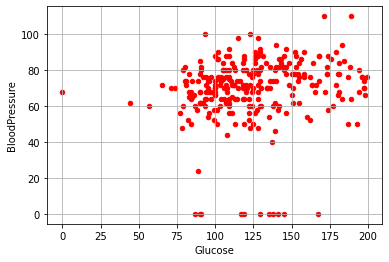

In [ ]:
data[data.DiabetesPedigreeFunction >= 0.5].plot(kind = "scatter", x = "Glucose", y = "BloodPressure", color = "red")
plt.xlabel("Glucose")
plt.ylabel("BloodPressure")
plt.grid(True)
plt.show()

# **Training Dataset**

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(652, 8)
(652,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(116, 8)
(116,)


In [ ]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,3.880368,121.162577,69.044479,20.088957,78.202454,31.920245,0.469325,33.434049
std,3.364829,31.676474,19.513031,15.915717,114.551924,7.693845,0.327931,11.851498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,22.000000,18.000000,32.000000,0.365000,29.000000
75%,6.000000,141.000000,80.000000,32.000000,125.250000,36.500000,0.610750,41.000000
max,15.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,72.000000


# **Support Vector Machine (SVM) Algorithm**

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("ACCURACY ON TRAINING:- {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("ACCURACY ON TESTING:- {:.2f}".format(svc.score(X_test_scaled, y_test)))

ACCURACY ON TRAINING:- 0.80
ACCURACY ON TESTING:- 0.80


In [ ]:
X_train_scaled[:5,:]

array([[0.33333333, 0.49748744, 0.60655738, 0.27272727, 0.        ,
        0.43219076, 0.05300668, 0.21568627],
       [0.06666667, 0.74874372, 0.55737705, 0.29292929, 0.1501182 ,
        0.4366617 , 0.11804009, 0.41176471],
       [0.        , 0.63819095, 0.6557377 , 0.37373737, 0.24822695,
        0.54098361, 0.32071269, 0.03921569],
       [0.06666667, 0.64321608, 0.72131148, 0.39393939, 0.13002364,
        0.54396423, 0.43340757, 0.31372549],
       [0.13333333, 0.42713568, 0.53278689, 0.        , 0.        ,
        0.59016393, 0.37683742, 0.11764706]])

In [ ]:
C = 0.25
svc = svm.SVC(kernel = "linear", C = C)
svc.fit(X_train_scaled, y_train)

print("ACCURACY ON TRAINING:- {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("ACCURACY ON TESTING:- {:.2f}".format(svc.score(X_test_scaled, y_test)))

ACCURACY ON TRAINING:- 0.77
ACCURACY ON TESTING:- 0.78


In [ ]:
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    rbf_svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(rbf_svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.784
Accuracy on test set: 0.784


In [ ]:
C = 0.6 # SVM regularization parameter
poly_svc = svm.SVC(kernel='poly', degree=1, C=C)
poly_svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    poly_svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(poly_svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.770
Accuracy on test set: 0.793


In [ ]:
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_train_scaled)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.7699386503067485
poly
0.8006134969325154
rbf
0.7960122699386503
sigmoid
0.4187116564417178


In [ ]:
model = svm.SVC(kernel = "linear")
model.fit(X_train_scaled, y_train)

YHat = model.predict(X_test_scaled)
print(round(accuracy_score(y_test, YHat)*100,2))

78.45


In [ ]:
from sklearn import metrics
print("Accuracy using SVM:- ",metrics.accuracy_score(y_test, YHat)*100)

Accuracy using SVM:-  78.44827586206897


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,YHat)

array([[67,  8],
       [17, 24]])

In [ ]:
print(classification_report(y_test,YHat))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        75
           1       0.75      0.59      0.66        41

    accuracy                           0.78       116
   macro avg       0.77      0.74      0.75       116
weighted avg       0.78      0.78      0.78       116



In [ ]:
print("MEAN SQ. ERROR:- %.2f\n" % mean_squared_error(y_test,YHat))

MEAN SQ. ERROR:- 0.22



# **Decision Tree Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 1)

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy using Decision Tree:- ",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy using Decision Tree:-  69.82758620689656


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[57, 18],
       [17, 24]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        75
           1       0.57      0.59      0.58        41

    accuracy                           0.70       116
   macro avg       0.67      0.67      0.67       116
weighted avg       0.70      0.70      0.70       116



In [ ]:
print("MEAN SQ. ERROR:- %.2f\n" % mean_squared_error(y_test,y_pred))

MEAN SQ. ERROR:- 0.30



# **Naive Bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB ()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy using Naive Bayes:- ",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy using Naive Bayes:-  76.72413793103449


In [ ]:
test_pred = model.predict(X_test)
print(metrics.classification_report(y_test,test_pred))
print(metrics.confusion_matrix(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        75
           1       0.69      0.61      0.65        41

    accuracy                           0.77       116
   macro avg       0.75      0.73      0.74       116
weighted avg       0.76      0.77      0.76       116

[[64 11]
 [16 25]]


In [ ]:
print("MEAN SQ. ERROR:- %.2f\n" % mean_squared_error(y_test,test_pred))

MEAN SQ. ERROR:- 0.23



## **Result Prediction**

In [ ]:
Pregnancies=int(input("\nPregnancy value(1 to 10):"))
Glucose=int(input("\nGluecose level( 80 to 200):"))
BloodPressure=int(input("\nBloodpressure between ( 10 to 100 ):"))
SkinThickness=int(input("\nSkinthickness( 0 to 60):"))
Insulin=int(input("\nInsulin( 1 to 500) :"))
BMI=float(input("\nBMI(20.0 to 40.0):"))
DiabetesPedigreeFunction = float(input("\nDiabetes Padigree value between (0.10 to 0.800):"))
Age=int(input("\nAge (15 to 60):"))

newx=[[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]

newy = model.predict(newx)

print("Your Chance of diabetes is: ",newy)


Pregnancy value(1 to 10):10

Gluecose level( 80 to 200):81

Bloodpressure between ( 10 to 100 ):11

Skinthickness( 0 to 60):61

Insulin( 1 to 500) :600

BMI(20.0 to 40.0):100

Diabetes Padigree value between (0.10 to 0.800):5

Age (15 to 60):98
Your Chance of diabetes is:  [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


#**Comparison of 3 Algorithms**

In [ ]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
3,0,0
201,0,0
411,0,0
502,1,0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.23275862068965517
Mean Squared Error: 0.23275862068965517
Root Mean Squared Error: 0.48245064067700766


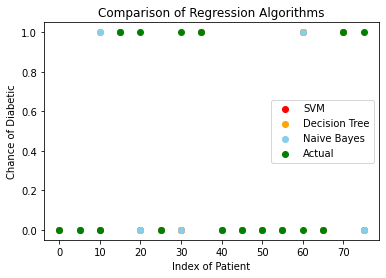

In [ ]:
import numpy as np
red = plt.scatter(np.arange(0,80,5),YHat[0:80:5],color = "red")
orange = plt.scatter(np.arange(0,80,5),y_pred[0:80:5],color = "orange")
skyblue = plt.scatter(np.arange(0,80,5),test_pred[0:80:5],color = "skyblue")
yellow = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "green")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Patient")
plt.ylabel("Chance of Diabetic")
plt.legend((red,orange,skyblue,yellow),('SVM', 'Decision Tree', 'Naive Bayes', 'Actual'))
plt.show()